In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np
import os
import scipy
from scipy import optimize as opt
plt.rcParams.update({'font.size': 13})

<IPython.core.display.Javascript object>


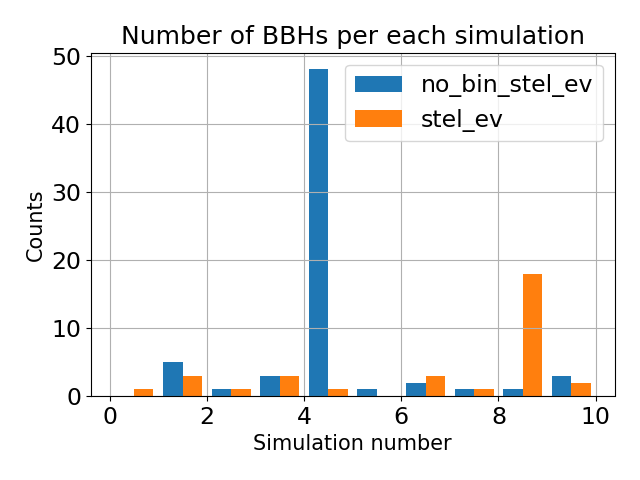

In [12]:
a = [5,1,3,48,1,2,1,1,1,2]
b=np.ones(48)*4
x=[1,1,1,1,1,2,3,3,3,5,6,6,7,8,9,10,10]
y=np.concatenate([x,b])

aa = [3,1,3,1,0,3,1,18,1,1]
bb=np.ones(18)*8
xx= [1,1,1,2,3,3,3,4,0,6,6,6,7,9,10]
yy=np.concatenate([xx,bb])

plt.hist([y,yy],bins=10,label=['no_bin_stel_ev','stel_ev'])
plt.xlabel('Simulation number', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Number of BBHs per each simulation', fontsize=18)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

#Save plot
filename = "/home/student/Documents/Computational_astrophysics/Statistics/"+"statistics_BBHs.png"
plt.savefig(filename)

2.0 1.0
10 2
364 3
367 4
403 5
404 6
425 7
426 8
486 9
487 10
1266 11
1267 12
1351 13
1354 14
1593 15
1601 16
1680 17
1682 18
1688 19
1689 20
2079 21
2087 22
2159 23
2167 24
2255 25
2259 26
2335 27
2343 28
2411 29
2412 30
2428 31
2429 32
2430 33
2432 34
2446 35
2450 36
2515 37
2516 38
2527 39
2534 40
2580 41
2587 42
2597 43
2598 44
2665 45
2669 46
2682 47
2686 48
[0, 10, 364, 367, 403, 404, 425, 426, 486, 487, 1266, 1267, 1351, 1354, 1593, 1601, 1680, 1682, 1688, 1689, 2079, 2087, 2159, 2167, 2255, 2259, 2335, 2343, 2411, 2412, 2428, 2429, 2430, 2432, 2446, 2450, 2515, 2516, 2527, 2534, 2580, 2587, 2597, 2598, 2665, 2669, 2682, 2686, 2705]
3.9892705380796887
0.6650760789119086
Standard deviation on parameter a is: 0.005093513493334216
Standard deviation on parameter b is: 0.0008036483602974074


<IPython.core.display.Javascript object>


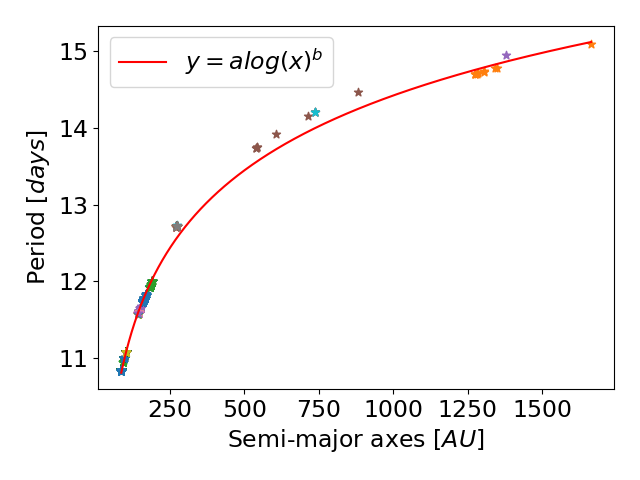

In [13]:
#no_bin_stel_ev_m2_e4_4
filepath="/home/student/Documents/Computational_astrophysics/Sorted/results_no_bin_stel_ev_m2_e4_4_sorted.txt" #insert correct path!
n1,n2,a1,ecc1,P1,time1 = np.genfromtxt(filepath,dtype="float", unpack=True, skip_header=1,usecols=(0,1,7,8,9,10))


count=1
il=[]
il.append(0)
print(n1[0], n2[0])
for e in range(len(n1)-1):
    if(n1[e] !=n1[e+1]) or (n2[e] !=n2[e+1]):
        count+=1
        il.append(e+1)
        print (e+1, count)
il.append(len(n1)-1)
print(il)

#Data
x=a1
y=np.log(P1)
N=len(x)


#Function
def f(x,a,b):
    return a*(np.log(x))**b


#Fit
popt,pcov=opt.curve_fit(f, x, y, p0=(0.,1/2.))

a_new=popt[0]
b_new=popt[1]

X=np.linspace(np.min(x), np.max(x), N)
Y=f(X,a_new,b_new)

print(a_new)
print(b_new)


#Error on parameters
perr = np.sqrt(np.diag(pcov))
sigma_a=perr[0]
sigma_b=perr[1]

print('Standard deviation on parameter a is:', sigma_a)
print('Standard deviation on parameter b is:', sigma_b)


#Plot
for i in range(len(il)):
    plt.scatter(x[il[i-1]:il[i]],y[il[i-1]:il[i]],marker='*')
plt.plot(X, Y, color='red', label='$y=a log(x)^b$')
plt.xlabel('Semi-major axes $[AU]$')
plt.ylabel('Period $[days]$')
plt.legend()
plt.tight_layout()
plt.show()

#Save plot
filename = "/home/student/Documents/Computational_astrophysics/Statistics/"+"a_p_no_bin_stel_ev_m2_e4_4.png"
plt.savefig(filename)


#output
#Standard deviation on parameter a is: 0.005093513493334216
#Standard deviation on parameter b is: 0.0008036483602974074

2.0 1.0
10 2
364 3
367 4
403 5
404 6
425 7
426 8
486 9
487 10
1266 11
1267 12
1351 13
1354 14
1593 15
1601 16
1680 17
1682 18
1688 19
1689 20
2079 21
2087 22
2159 23
2167 24
2255 25
2259 26
2335 27
2343 28
2411 29
2412 30
2428 31
2429 32
2430 33
2432 34
2446 35
2450 36
2515 37
2516 38
2527 39
2534 40
2580 41
2587 42
2597 43
2598 44
2665 45
2669 46
2682 47
2686 48
[0, 10, 364, 367, 403, 404, 425, 426, 486, 487, 1266, 1267, 1351, 1354, 1593, 1601, 1680, 1682, 1688, 1689, 2079, 2087, 2159, 2167, 2255, 2259, 2335, 2343, 2411, 2412, 2428, 2429, 2430, 2432, 2446, 2450, 2515, 2516, 2527, 2534, 2580, 2587, 2597, 2598, 2665, 2669, 2682, 2686, 2705]
3.9681302315122755
0.6863459155028543
Standard deviation on parameter a is: 0.0029363080373129903
Standard deviation on parameter b is: 0.0004956211827236156


<IPython.core.display.Javascript object>


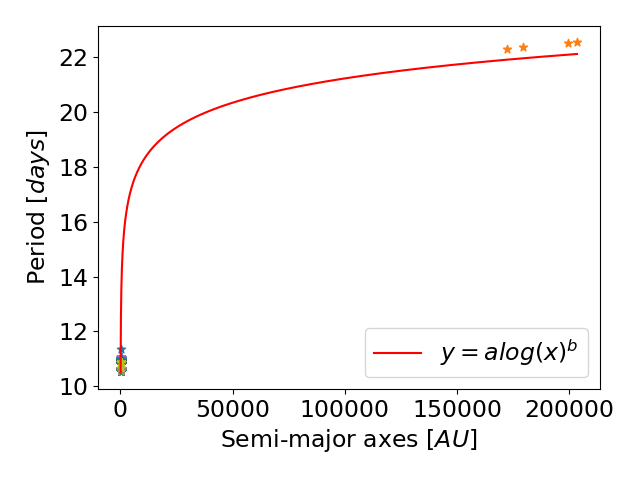

In [14]:
#stel_ev_m2_e4_8
filepath="/home/student/Documents/Computational_astrophysics/Sorted/results_stel_ev_m2_e4_8_sorted.txt" #insert correct path!
a1,ecc1,P1,time1 = np.genfromtxt(filepath,dtype="float", unpack=True, skip_header=1,usecols=(7,8,9,10))

count=1
il=[]
il.append(0)
print(n1[0], n2[0])
for e in range(len(n1)-1):
    if(n1[e] !=n1[e+1]) or (n2[e] !=n2[e+1]):
        count+=1
        il.append(e+1)
        print (e+1, count)
il.append(len(n1)-1)
print(il)

#Data
x=a1
y=np.log(P1)
N=len(x)


#Function
def f(x,a,b):
    return a*(np.log(x))**b


#Fit
popt,pcov=opt.curve_fit(f, x, y, p0=(0.,1/2.))

a_new=popt[0]
b_new=popt[1]

print(a_new)
print(b_new)

X=np.linspace(np.min(x), np.max(x), N)
Y=f(X,a_new,b_new)


#Error on parameters
perr = np.sqrt(np.diag(pcov))
sigma_a=perr[0]
sigma_b=perr[1]

print('Standard deviation on parameter a is:', sigma_a)
print('Standard deviation on parameter b is:', sigma_b)


#Plot
for i in range(len(il)):
    plt.scatter(x[il[i-1]:il[i]],y[il[i-1]:il[i]],marker='*')
plt.plot(X, Y, color='red', label='$y=a log(x)^b$')
plt.xlabel('Semi-major axes $[AU]$')
plt.ylabel('Period $[days]$')
plt.legend()
plt.tight_layout()
plt.show()

#Save plot
filename = "/home/student/Documents/Computational_astrophysics/Statistics/"+"a_p_stel_ev_m2_e4_8.png"
plt.savefig(filename)



#output
#Standard deviation on parameter a is: 0.0029363080373129903
#Standard deviation on parameter b is: 0.0004956211827236156

2.0 1.0
10 2
364 3
367 4
403 5
404 6
425 7
426 8
486 9
487 10
1266 11
1267 12
1351 13
1354 14
1593 15
1601 16
1680 17
1682 18
1688 19
1689 20
2079 21
2087 22
2159 23
2167 24
2255 25
2259 26
2335 27
2343 28
2411 29
2412 30
2428 31
2429 32
2430 33
2432 34
2446 35
2450 36
2515 37
2516 38
2527 39
2534 40
2580 41
2587 42
2597 43
2598 44
2665 45
2669 46
2682 47
2686 48
[0, 10, 364, 367, 403, 404, 425, 426, 486, 487, 1266, 1267, 1351, 1354, 1593, 1601, 1680, 1682, 1688, 1689, 2079, 2087, 2159, 2167, 2255, 2259, 2335, 2343, 2411, 2412, 2428, 2429, 2430, 2432, 2446, 2450, 2515, 2516, 2527, 2534, 2580, 2587, 2597, 2598, 2665, 2669, 2682, 2686, 2705]


<IPython.core.display.Javascript object>


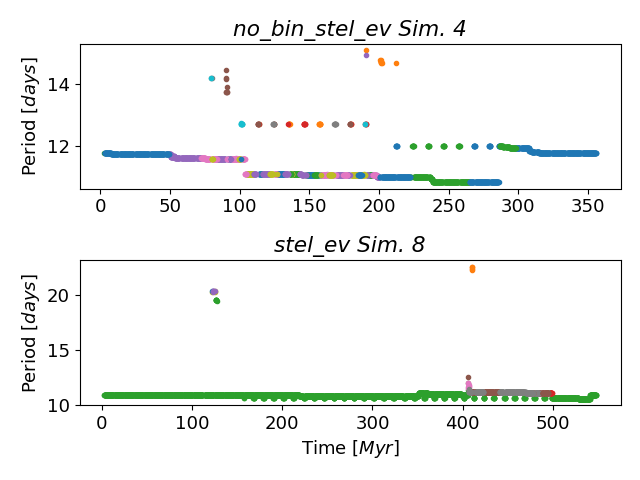

5.0 1.0
4 2
3510 3
3534 4
3535 5
3536 6
3537 7
3587 8
3590 9
3606 10
3607 11
3611 12
3618 13
3636 14
3641 15
3843 16
3849 17
4199 18
[0, 4, 3510, 3534, 3535, 3536, 3537, 3587, 3590, 3606, 3607, 3611, 3618, 3636, 3641, 3843, 3849, 4199, 4199]


In [19]:
#no_bin_stel_ev_m2_e4_4
filepath="/home/student/Documents/Computational_astrophysics/Sorted/results_no_bin_stel_ev_m2_e4_4_sorted.txt" #insert correct path!
n1,n2,a1,ecc1,P1,time1 = np.genfromtxt(filepath,dtype="float", unpack=True, skip_header=1,usecols=(0,1,7,8,9,10))

count=1
il=[]
il.append(0)
print(n1[0], n2[0])
for e in range(len(n1)-1):
    if(n1[e] !=n1[e+1]) or (n2[e] !=n2[e+1]):
        count+=1
        il.append(e+1)
        print (e+1, count)
il.append(len(n1)-1)
print(il)

#Data
x=time1
y=np.log(P1)

#Subplots
fig, (ax1, ax2) = plt.subplots(2)

#Plot
for i in range(len(il)):
    ax1.scatter(x[il[i-1]:il[i]],y[il[i-1]:il[i]],marker='.')
#ax1.set_xlabel('Time [$Myr$]')
ax1.set_ylabel('Period $[days]$')
ax1.set_title('no_bin_stel_ev Sim. 4', style='italic')


#stel_ev_m2_e4_8
filepath="/home/student/Documents/Computational_astrophysics/Sorted/results_stel_ev_m2_e4_8_sorted.txt" #insert correct path!
n1,n2,a1,ecc1,P1,time1 = np.genfromtxt(filepath,dtype="float", unpack=True, skip_header=1,usecols=(0,1,7,8,9,10))

count=1
il=[]
il.append(0)
print(n1[0], n2[0])
for e in range(len(n1)-1):
    if(n1[e] !=n1[e+1]) or (n2[e] !=n2[e+1]):
        count+=1
        il.append(e+1)
        print (e+1, count)
il.append(len(n1)-1)
print(il)

#Data
x=time1
y=np.log(P1)

#Plot
for i in range(len(il)):
    ax2.scatter(x[il[i-1]:il[i]],y[il[i-1]:il[i]],marker='.')
ax2.set_xlabel('Time [$Myr$]')
ax2.set_ylabel('Period $[days]$')
ax2.set_title('stel_ev Sim. 8', style='italic')

plt.tight_layout()
plt.show()

#Save plot
filename = "/home/student/Documents/Computational_astrophysics/Statistics/plot_patty/"+"time_p.png"
plt.savefig(filename)
